<a href="https://colab.research.google.com/github/foosl123/Individual_Assignment/blob/master/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import urllib.request

In [5]:
# from google.colab import files
# uploaded = files.upload()

In [6]:
# Load dataset.csv into the notebook.
data = pd.read_csv("dataset.csv")

In [7]:
data.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,54:00.0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1.0
1,21:31.0,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1.0
2,18:00.0,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1.0
3,43:00.0,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5.0
4,57:17.0,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2.0


# Split dataset into train set and test set


In [8]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

Length of train_set: 20624
Length of test_set: 5156


# Visualization of the Dataset (Done By: Chan Heng Hung)

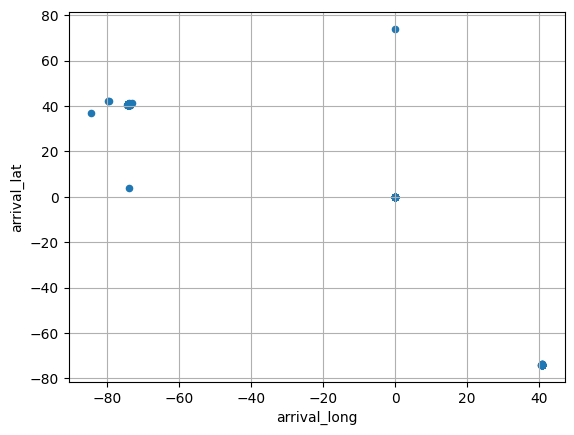

In [9]:
train_set.plot(kind="scatter", x="arrival_long", y="arrival_lat", grid=True)
plt.show()

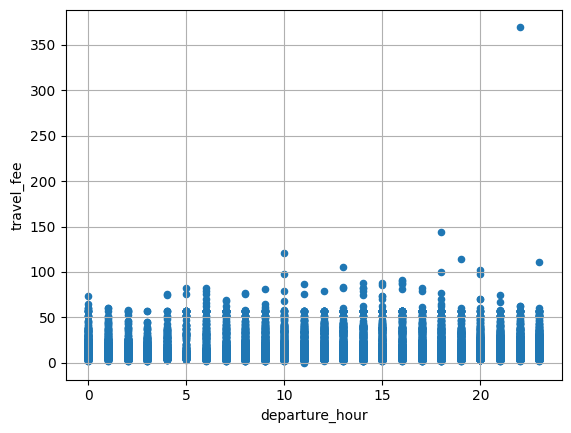

In [10]:
train_set['departure_time'] = pd.to_datetime(train_set['departure_time'])
train_set['departure_hour'] = train_set['departure_time'].dt.hour
train_set.plot(kind="scatter", x="departure_hour", y="travel_fee", grid=True)
plt.show()

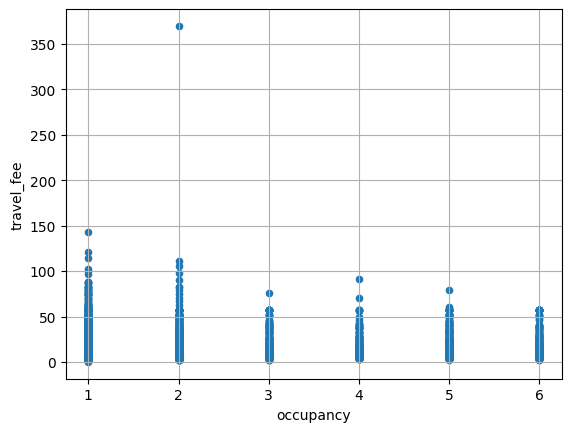

In [11]:
train_set.plot(kind="scatter", x="occupancy", y="travel_fee", grid=True)
plt.show()

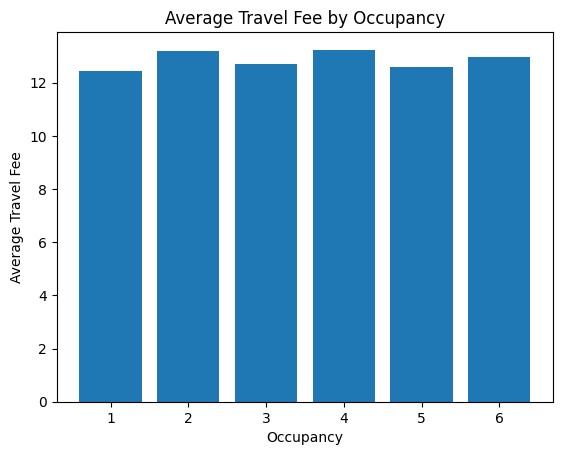

In [12]:
average_fare_by_occupancy = train_set.groupby('occupancy')['travel_fee'].mean()

plt.bar(average_fare_by_occupancy.index, average_fare_by_occupancy.values)
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.title('Average Travel Fee by Occupancy')
plt.xticks(average_fare_by_occupancy.index)
plt.show()

In [13]:
average_fare_by_dow = train_set.groupby('day_of_week')['travel_fee'].mean()

plt.plot(average_fare_by_dow.index, average_fare_by_dow.values, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Travel Fee')
plt.title('Average Travel Fee Trend by Departure Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid()
plt.show()

KeyError: ignored

# Correlation Between Attributes (Done By: Eason Chuah)




In [14]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
arrival_long      0.016078
occupancy         0.013558
departure_long    0.008077
departure_lat    -0.008036
arrival_lat      -0.014681
departure_hour   -0.015048
Name: travel_fee, dtype: float64

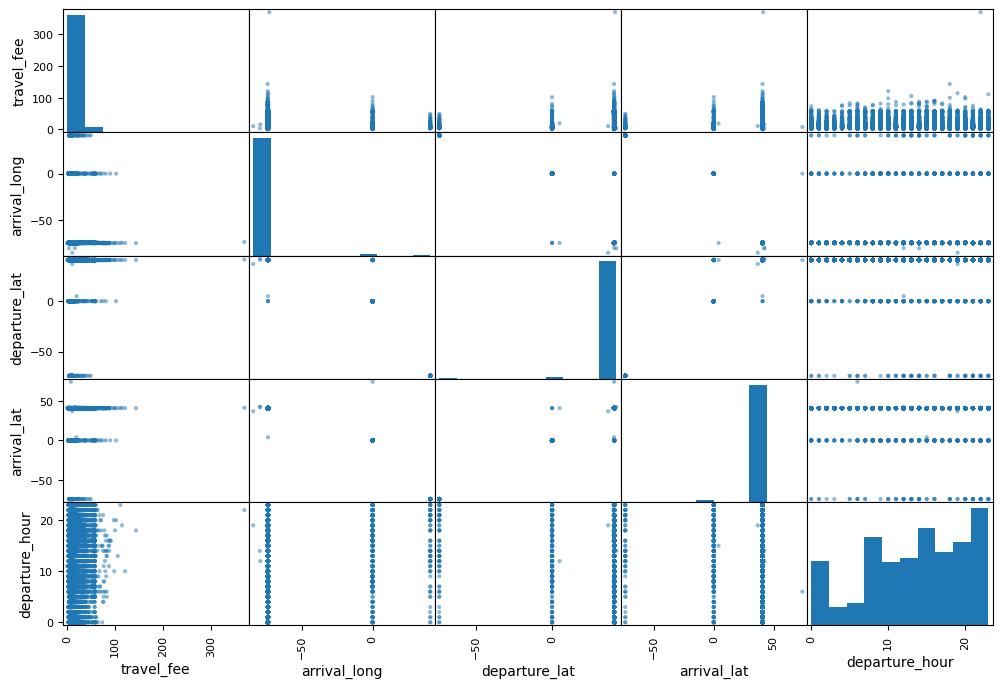

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["travel_fee", "arrival_long","departure_lat","arrival_lat","departure_hour"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

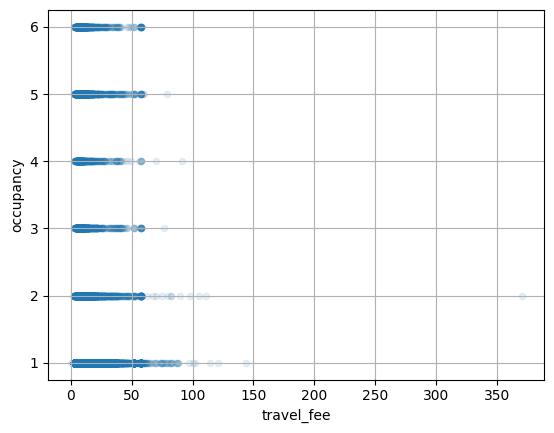

In [16]:
train_set.plot(kind="scatter", x="travel_fee", y="occupancy", alpha=0.1, grid=True)
plt.show()

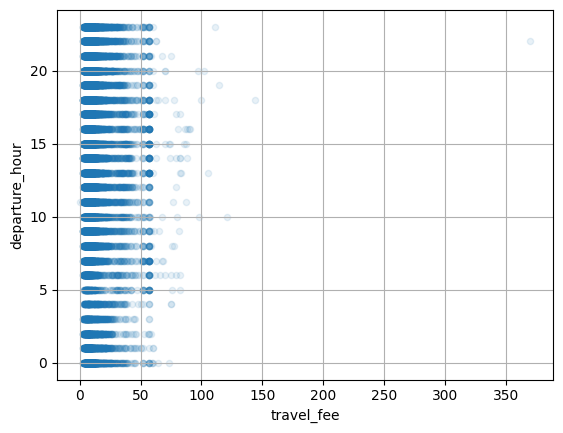

In [17]:
train_set.plot(kind="scatter", x="travel_fee", y="departure_hour", alpha=0.1, grid=True)
plt.show()

# Data Preprocessing(Done By:Foo Shao Lun)

# 1. Data Cleaning

# Handle Missing Values

In [19]:
data.dropna(inplace=True)

# Handle Outliers using IQR

In [21]:
def remove_outliers_using_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in ['travel_fee', 'departure_long', 'departure_lat', 'arrival_long', 'arrival_lat']:
    df = remove_outliers_using_iqr(data, col)

# 2. Handle Text Features

In [22]:
# Drop the 'ID' column
df.drop(columns=['ID'], inplace=True)

<ipython-input-22-563c63973312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ID'], inplace=True)


In [23]:
# Convert 'departure_time' to datetime format and extract components
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['hour'] = df['departure_time'].dt.hour
df['day_of_week'] = df['departure_time'].dt.dayofweek
df['month'] = df['departure_time'].dt.month
df.drop(columns=['departure_time'], inplace=True)

<ipython-input-23-5ea3b34cab27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_time'] = pd.to_datetime(df['departure_time'])
<ipython-input-23-5ea3b34cab27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['departure_time'].dt.hour
<ipython-input-23-5ea3b34cab27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

# 3. Feature Engineering

In [26]:
# Calculate distance traveled using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['distance_traveled'] = haversine_distance(df['departure_lat'], df['departure_long'], df['arrival_lat'], df['arrival_long'])

<ipython-input-26-8b913e3cf92e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_traveled'] = haversine_distance(df['departure_lat'], df['departure_long'], df['arrival_lat'], df['arrival_long'])


# 4. Feature Scaling

In [31]:
# Standard scaling for numerical feature
from sklearn.preprocessing import StandardScaler
features_to_scale = ['travel_fee', 'departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'occupancy', 'hour', 'day_of_week', 'month', 'distance_traveled']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows
print(df.head())

   travel_fee  departure_long  departure_lat  arrival_long  arrival_lat  \
0   -0.513199       -0.039899      -0.006770     -1.122593    -1.726506   
1   -0.673857       -0.045751      -0.031087     -1.380462    -1.484435   
2    1.039826       -0.030404       0.031653      1.231629    -1.627426   
3   -0.245436       -0.038105      -0.013161     -0.523291    -0.147955   
5   -0.620304       -0.029849       0.026838     -0.675112     0.481712   

   occupancy      hour  day_of_week     month  distance_traveled  
0  -0.511305  0.841408    -1.037577  0.168065          -0.026404  
1  -0.511305 -2.087906     1.007134  0.744427          -0.032870  
2  -0.511305 -1.625383     1.518311 -0.120116           0.000289  
3   2.431702 -0.083639     1.007134  0.168065          -0.021055  
5  -0.511305 -0.391988    -0.526399  0.744427          -0.032312  


<ipython-input-31-5ec23b3bafb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
